In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читання файлу
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
# Перегляд перших 5 рядків таблиці
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [66]:
# Розмір таблиці
print(df.shape)
unique_names = df['name'].nunique()
print('Унікальних назв:', unique_names)
# Відповідь: Про скільки книг зберігає дані датасет? - 550
# Унікальних назв: 351

(550, 7)
Унікальних назв: 351


In [7]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [9]:
# Перевірка кількості пропусків в кожному стовпці
missing_data = df.isna().sum()
print('Кількість пропусків у кожному стовпці:')
print(missing_data)
#Відповідь: Чи є в якихось змінних пропуски? ні

Кількість пропусків у кожному стовпці:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [10]:
# Перевірка унікальних значень в колонці 'genre'
unique_genres = df['genre'].unique()
print('Унікальні жанри:')
print(unique_genres)
# Відповідь: Які є унікальні жанри? - 'Non Fiction' 'Fiction'

Унікальні жанри:
['Non Fiction' 'Fiction']


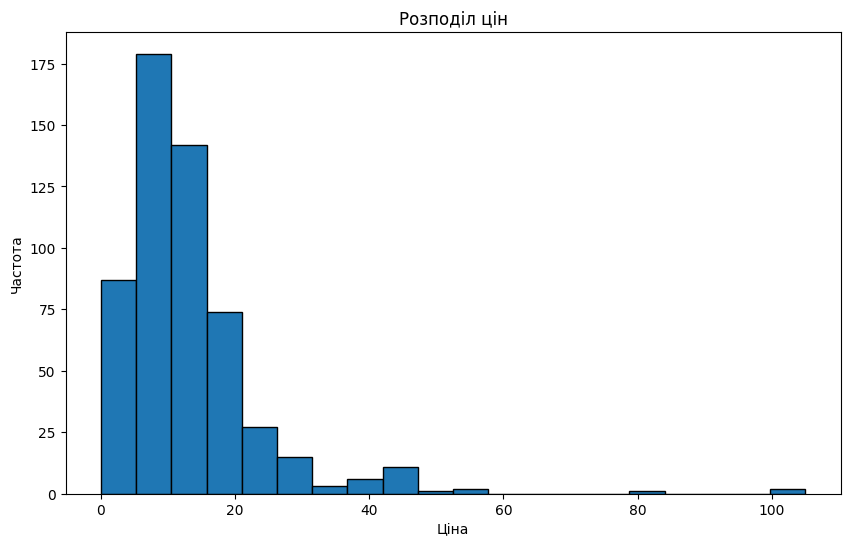

In [12]:
# Побудова гістограми для розподілу цін
df['price'].plot(kind='hist', figsize=(10, 6), bins=20, edgecolor='black')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [13]:
# Визначення статистик по ціні
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f'Максимальна ціна: {max_price}')
print(f'Мінімальна ціна: {min_price}')
print(f'Середня ціна: {mean_price}')
print(f'Медіанна ціна: {median_price}')

#Відповідь: Максимальна ціна? - 105
#Відповідь: Мінімальна ціна? - 0
#Відповідь: Середня ціна? - 13.1
#Відповідь: Медіанна ціна? - 11.0


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [24]:
highest_rating = df['user_rating'].max()
print("Найвищий рейтинг:", highest_rating)
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

books_with_highest_rating = df[df['user_rating'] == highest_rating]
print("Кількість книг з найвищим рейтингом:", books_with_highest_rating.shape[0])
#Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

book_with_most_reviews = df.loc[df['reviews'].idxmax()]
print("Книга з найбільше відгуками:", book_with_most_reviews['name'])
#Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

top_50_2015 = df[(df['year'] == 2015)].nlargest(50, 'user_rating')
most_expensive_book_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]
print("Найдорожча книга у Топ-50 2015 року:", most_expensive_book_2015['name'])
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition

top_50_2010_fiction = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].nlargest(50, 'user_rating')
print("Кількість книг жанру Fiction у Топ-50 2010 року:", top_50_2010_fiction.shape[0])
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

books_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", books_4_9_2010_2011.shape[0])
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

books_under_8_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
print("Остання книга в відсортованому списку:", books_under_8_2015.iloc[-1]['name'])
#Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом: 52
Книга з найбільше відгуками: Where the Crawdads Sing
Найдорожча книга у Топ-50 2015 року: Publication Manual of the American Psychological Association, 6th Edition
Кількість книг жанру Fiction у Топ-50 2010 року: 20
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1
Остання книга в відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [25]:
# Групування за жанром та підрахунок мінімальних та максимальних цін
price_by_genre = df.groupby('genre')['price'].agg(['min', 'max'])
print(price_by_genre)

#Відповідь: Максимальна ціна для жанру Fiction: Відповідь: 82
#Відповідь: Мінімальна ціна для жанру Fiction: Відповідь: 0
#Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: 105
#Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: 0

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


In [29]:
# Групування за автором та підрахунок кількості книг
books_by_author = df.groupby('author')['name'].count()
print(books_by_author)
print('розмірність таблиці ', books_by_author.shape)
print('автор який має найбвльше книг ', books_by_author.idxmax())
print('кількість книг цього автора', books_by_author.max())

#Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248, 1
#Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
#Відповідь: Скільки книг цього автора? Відповідь: 12

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64
розмірність таблиці  (248,)
автор який має найбвльше книг  Jeff Kinney
еількість книг цього автора 12


In [33]:
# Групування за автором та підрахунок середнього рейтингу
avg_rating_by_author = df.groupby('author')['user_rating'].agg('mean')
print(avg_rating_by_author)
print('автор у якого середній рейтинг мінімальний ', avg_rating_by_author.idxmin())
print('мінімальний середній рейтинг ', avg_rating_by_author.min())

#Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
#Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9


author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64
автор у якого середній рейтинг мінімальний  Donna Tartt
мінімальний середній рейтинг  3.9


In [37]:
# Об'єднання двох таблиць за допомогою concat
combined = pd.concat([books_by_author, avg_rating_by_author], axis=1)
combined.columns = ['book_count', 'avg_rating']
print(combined)


                            book_count  avg_rating
author                                            
Abraham Verghese                     2    4.600000
Adam Gasiewski                       1    4.400000
Adam Mansbach                        1    4.800000
Adir Levy                            1    4.800000
Admiral William H. McRaven           1    4.700000
...                                ...         ...
Walter Isaacson                      3    4.566667
William Davis                        2    4.400000
William P. Young                     2    4.600000
Wizards RPG Team                     3    4.800000
Zhi Gang Sha                         2    4.600000

[248 rows x 2 columns]


In [35]:
# Сортування за кількістю книг і середнім рейтингом
sorted_combined = combined.sort_values(by=['book_count', 'avg_rating'], ascending=True)
print(sorted_combined)

#Відповідь: Який автор перший у списку? Muriel Barbery

                                    book_count  avg_rating
author                                                    
Muriel Barbery                               1    4.000000
Chris Cleave                                 1    4.100000
Ian K. Smith M.D.                            1    4.100000
Pierre Dukan                                 1    4.100000
Elizabeth Strout                             1    4.200000
...                                        ...         ...
American Psychological Association          10    4.500000
Suzanne Collins                             11    4.663636
Gary Chapman                                11    4.736364
Rick Riordan                                11    4.772727
Jeff Kinney                                 12    4.800000

[248 rows x 2 columns]


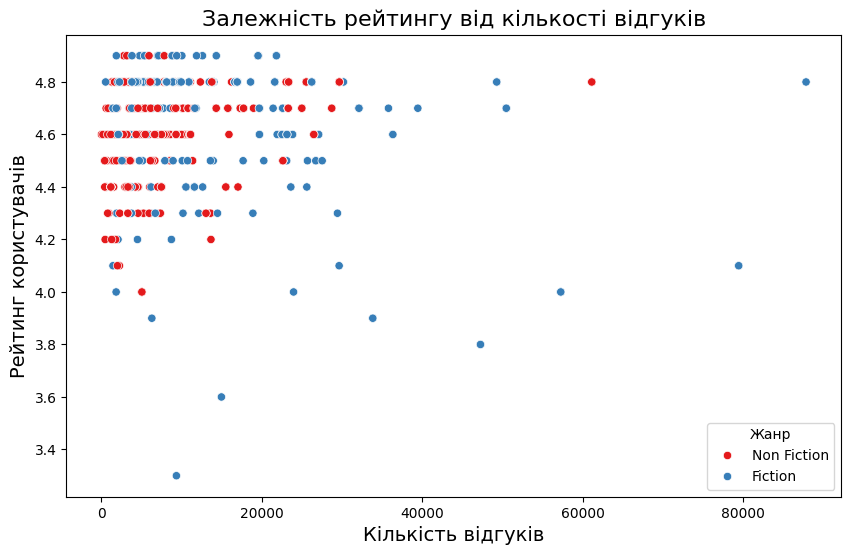

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='user_rating', data=df, hue='genre', palette='Set1')
plt.title('Залежність рейтингу від кількості відгуків', fontsize=16)
plt.xlabel('Кількість відгуків', fontsize=14)
plt.ylabel('Рейтинг користувачів', fontsize=14)
plt.legend(title='Жанр')
plt.show()

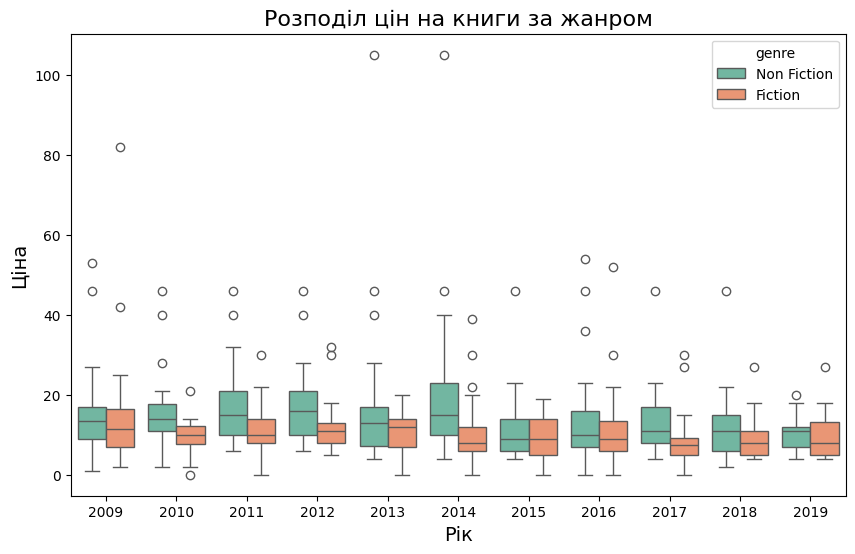

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=df, palette='Set2', hue='genre', legend=True)
plt.title('Розподіл цін на книги за жанром', fontsize=16)
plt.xlabel('Рік', fontsize=14)
plt.ylabel('Ціна', fontsize=14)
plt.show()